In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [2]:
def cross_val_predict(model, k, X, y) -> Tuple[np.array, np.array, np.array]:

    kfold = StratifiedKFold(n_splits=k)
    model_ = cp.deepcopy(model)
    acc_score = []
    pre_score = []
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X,y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        pred_values = model_.predict(test_X)
        acc = accuracy_score(pred_values , test_y)
        pre = precision_score(pred_values , test_y)
        acc_score.append(acc)
        pre_score.append(pre)
        predicted_classes = np.append(predicted_classes, pred_values)
        avg_acc_score = sum(acc_score)/k
        avg_pre_score = sum (pre_score)/k

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('precission of each fold - {}'.format(pre_score))
    print('Avg precission : {}'.format(avg_pre_score))

    return actual_classes, predicted_classes, predicted_proba

In [3]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    plt.show()

In [12]:
dataframe = pd.read_csv('X_a_n.csv')

X = dataframe.iloc[:, 3:-1].values
y = dataframe.iloc [:, 6374]

k=10

In [14]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2292    0
2293    0
2294    0
2295    0
2296    0
Name: healthy, Length: 2297, dtype: int64

In [ ]:
param_grid = [
        {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree' : [0,1,2,3,4,5,6,7,8,9],
            'gamma' : ['scale', 'auto'],
            'C': [1, 10, 100, 1000]
        }
       ]
clf = GridSearchCV(svm.SVC(), param_grid,
                           scoring='accuracy')
clf.fit(X_scaled,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

accuracy of each fold - [0.8695652173913043, 0.8608695652173913, 0.8956521739130435, 0.717391304347826, 0.6739130434782609, 0.7304347826086957, 0.7347826086956522, 0.6986899563318777, 0.7467248908296943, 0.6200873362445415]
Avg accuracy : 0.7548110879058287
precission of each fold - [0.7902097902097902, 0.7762237762237763, 0.8321678321678322, 0.7762237762237763, 0.7412587412587412, 0.8741258741258742, 0.8671328671328671, 0.8943661971830986, 0.8450704225352113, 0.8028169014084507]
Avg precission : 0.8199596178469417


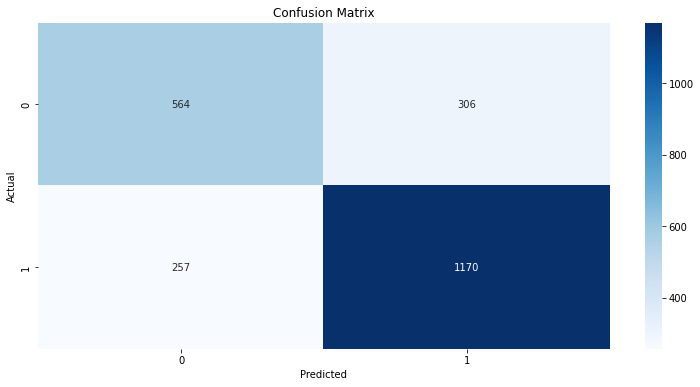

In [15]:
model =  svm.SVC(kernel='rbf', C=100)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [ ]:
param_grid = [
        {
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
            'C': [1, 10, 100, 1000]
        }
       ]
clf = GridSearchCV(LogisticRegression(), param_grid,
                           scoring='accuracy')
clf.fit(X_scaled,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

In [ ]:
model = LogisticRegression(random_state=16)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [ ]:
model = GaussianNB()
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [ ]:
param_grid = [
        {
            'n_estimators': [200, 500,700],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
       ]
clf = GridSearchCV(RandomForestClassifier(), param_grid,
                           scoring='accuracy')
clf.fit(X_scaled,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

In [ ]:
model = RandomForestClassifier(max_depth=20, random_state=0)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)
clf = GridSearchCV(ABC, param_grid, 
                           scoring='accuracy')
clf.fit(X_scaled,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [17]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ],
             'max_iter': [2000]
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, 
                           scoring='accuracy')
clf.fit(X_scaled,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'relu', 'hidden_layer_sizes': (16,), 'max_iter': 2000, 'solver': 'adam'}


accuracy of each fold - [0.7478260869565218, 0.9739130434782609, 0.9956521739130435, 0.9826086956521739, 0.991304347826087, 0.9782608695652174, 0.991304347826087, 0.9956331877729258, 0.9781659388646288, 0.9563318777292577]
Avg accuracy : 0.9591000569584203
precission of each fold - [0.5944055944055944, 0.958041958041958, 0.993006993006993, 0.972027972027972, 0.986013986013986, 0.972027972027972, 0.986013986013986, 0.9929577464788732, 0.9859154929577465, 0.9436619718309859]
Avg precission : 0.9384073672806066


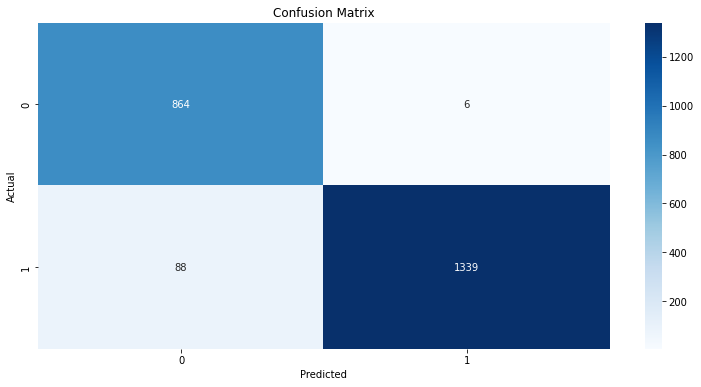

In [16]:
model = MLPClassifier(activation='logistic', hidden_layer_sizes=(1,), solver='sgd', max_iter=2000,warm_start=True)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])